**PROBLEM :** Classification of corrosion severity levels. By utilizing different Machine Learning algorithms and their hyperparameter optimization to present the best performing moddel.

**Sanaullah Shah + Herbert + Jasmine     LISUM11       Data Science  iamkadhimi@gmail.com    Pakistan  NUST, Islamabad**

# **WEEK 9**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\User1\Desktop\MLData.csv')
df.head()

In [3]:
df.columns

Index(['Sample#', 'Target', 'Weight before[g]', 'Weight After[g]',
       'Weight Loss[g]', '%Weight Loss', 'Thickness Before [mm]',
       'Thickness After[mm] ', 'Thickness Loss[mm]', '% Thickness Loss',
       'Time(hrs)', 'Surface Area[L*W]'],
      dtype='object')

In [4]:
df.isna().sum()

Sample#                  0
Target                   0
Weight before[g]         0
Weight After[g]          0
Weight Loss[g]           0
%Weight Loss             0
Thickness Before [mm]    0
Thickness After[mm]      0
Thickness Loss[mm]       0
% Thickness Loss         0
Time(hrs)                0
Surface Area[L*W]        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sample#                48 non-null     int64  
 1   Target                 48 non-null     object 
 2   Weight before[g]       48 non-null     float64
 3   Weight After[g]        48 non-null     float64
 4   Weight Loss[g]         48 non-null     float64
 5   %Weight Loss           48 non-null     float64
 6   Thickness Before [mm]  48 non-null     float64
 7   Thickness After[mm]    48 non-null     float64
 8   Thickness Loss[mm]     48 non-null     float64
 9   % Thickness Loss       48 non-null     float64
 10  Time(hrs)              48 non-null     int64  
 11  Surface Area[L*W]      48 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ KB


In [6]:
df.describe()

,Sample#,Weight before[g],Weight After[g],Weight Loss[g],%Weight Loss,Thickness Before [mm],Thickness After[mm],Thickness Loss[mm],% Thickness Loss,Time(hrs),Surface Area[L*W]
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00
mean,24.50,67.548333,62.205625,5.342708,7.906681,6.078333,5.715417,0.362917,5.960562,2.500000,2.25
std,14.00,3.530610,4.123623,2.603403,3.821401,0.081249,0.168371,0.173940,2.825970,1.129865,0.00
min,1.00,63.350000,55.090000,1.430000,2.153939,5.990000,5.380000,0.110000,1.833333,1.000000,2.25
25%,12.75,64.982500,59.780000,3.195000,4.869630,6.017500,5.597500,0.237500,3.838333,1.750000,2.25
50%,24.50,66.725000,61.835000,5.110000,7.705269,6.055000,5.740000,0.355000,5.796667,2.500000,2.25
75%,36.25,67.900000,64.830000,7.382500,10.938801,6.125000,5.872500,0.477500,7.930921,3.250000,2.25
max,48.00,75.000000,72.920000,9.720000,14.997686,6.250000,6.010000,0.820000,13.225806,4.000000,2.25


# WEEK 10

# Exploratory Data Analysis (EDA)

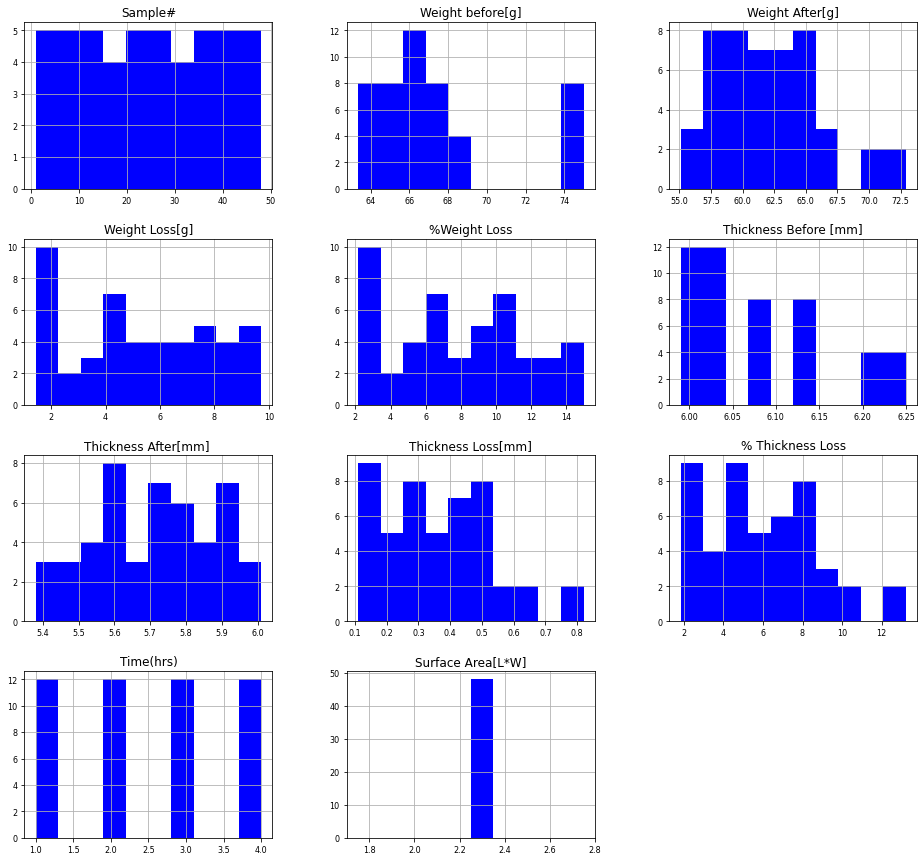

In [7]:
df.hist(figsize=(16, 15), xlabelsize=8, ylabelsize=8, color = "blue")
plt.show()

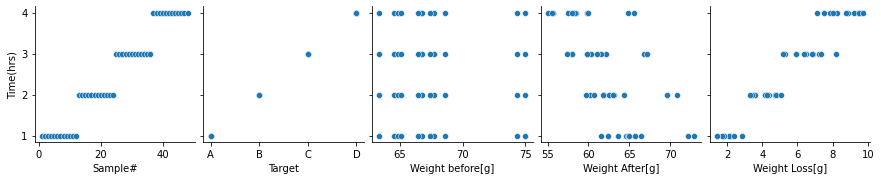

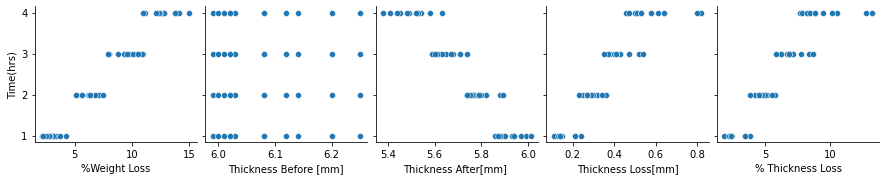

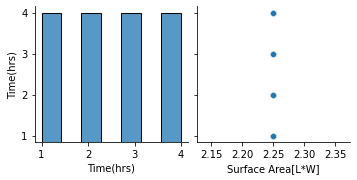

In [8]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Time(hrs)'])

In [9]:
df.drop(['Weight before[g]','Weight After[g]','Thickness Before [mm]','Sample#','Surface Area[L*W]','Target'],axis=1)

,Weight Loss[g],%Weight Loss,Thickness After[mm],Thickness Loss[mm],% Thickness Loss,Time(hrs)
0,2.08,2.773333,5.99,0.21,3.387097,1
1,2.23,2.998521,6.01,0.24,3.840000,1
2,2.14,3.208396,5.97,0.15,2.450980,1
3,2.85,4.210993,5.94,0.14,2.302632,1
4,2.16,3.348318,5.93,0.21,3.420195,1
5,2.12,3.092182,5.86,0.13,2.170284,1
6,2.41,3.718562,5.89,0.13,2.159468,1
7,1.83,2.888713,5.89,0.11,1.833333,1
8,1.84,2.756554,5.94,0.14,2.302632,1
9,1.69,2.506675,5.90,0.13,2.155887,1


In [10]:
df.head()

,Sample#,Target,Weight before[g],Weight After[g],Weight Loss[g],%Weight Loss,Thickness Before [mm],Thickness After[mm],Thickness Loss[mm],% Thickness Loss,Time(hrs),Surface Area[L*W]
0,1,A,75.00,72.92,2.08,2.773333,6.20,5.99,0.21,3.387097,1,2.25
1,2,A,74.37,72.14,2.23,2.998521,6.25,6.01,0.24,3.840000,1,2.25
2,3,A,66.70,64.56,2.14,3.208396,6.12,5.97,0.15,2.450980,1,2.25
3,4,A,67.68,64.83,2.85,4.210993,6.08,5.94,0.14,2.302632,1,2.25
4,5,A,64.51,62.35,2.16,3.348318,6.14,5.93,0.21,3.420195,1,2.25


In [11]:
correlation = df.corr()
correlation

,Sample#,Weight before[g],Weight After[g],Weight Loss[g],%Weight Loss,Thickness Before [mm],Thickness After[mm],Thickness Loss[mm],% Thickness Loss,Time(hrs),Surface Area[L*W]
Sample#,1.000000,-1.620392e-01,-0.695852,0.882434,0.906685,-1.937828e-01,-0.948749,0.827854,0.843122,9.684560e-01,NaN
Weight before[g],-0.162039,1.000000e+00,0.779309,0.121777,0.014210,7.411952e-01,0.075902,0.272748,0.250867,2.112812e-15,NaN
Weight After[g],-0.695852,7.793087e-01,1.000000,-0.527074,-0.614643,5.418300e-01,0.636137,-0.362676,-0.384706,-6.092123e-01,NaN
Weight Loss[g],0.882434,1.217770e-01,-0.527074,1.000000,0.992826,1.469493e-01,-0.904666,0.944342,0.949563,9.649528e-01,NaN
%Weight Loss,0.906685,1.421003e-02,-0.614643,0.992826,1.000000,6.899058e-02,-0.912462,0.915473,0.923592,9.729612e-01,NaN
Thickness Before [mm],-0.193783,7.411952e-01,0.541830,0.146949,0.068991,1.000000e+00,0.171602,0.301002,0.273042,5.381124e-15,NaN
Thickness After[mm],-0.948749,7.590161e-02,0.636137,-0.904666,-0.912462,1.716023e-01,1.000000,-0.887825,-0.900769,-9.461909e-01,NaN
Thickness Loss[mm],0.827854,2.727481e-01,-0.362676,0.944342,0.915473,3.010018e-01,-0.887825,1.000000,0.999469,9.158961e-01,NaN
% Thickness Loss,0.843122,2.508666e-01,-0.384706,0.949563,0.923592,2.730424e-01,-0.900769,0.999469,1.000000,9.260496e-01,NaN
Time(hrs),0.968456,2.112812e-15,-0.609212,0.964953,0.972961,5.381124e-15,-0.946191,0.915896,0.926050,1.000000e+00,NaN


In [ ]:
# plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

# WEEK 11

# Data Preprocessing

In [13]:
xx = df[['Weight Loss[g]','%Weight Loss','Thickness Loss[mm]','% Thickness Loss']]

In [14]:
yy = df['Time(hrs)']

In [15]:
xx.head()

,Weight Loss[g],%Weight Loss,Thickness Loss[mm],% Thickness Loss
0,2.08,2.773333,0.21,3.387097
1,2.23,2.998521,0.24,3.840000
2,2.14,3.208396,0.15,2.450980
3,2.85,4.210993,0.14,2.302632
4,2.16,3.348318,0.21,3.420195


In [16]:
yy.head()

0    1
1    1
2    1
3    1
4    1
Name: Time(hrs), dtype: int64

In [17]:
xx.shape

(48, 4)

In [18]:
yy.shape

(48,)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sample#                48 non-null     int64  
 1   Target                 48 non-null     object 
 2   Weight before[g]       48 non-null     float64
 3   Weight After[g]        48 non-null     float64
 4   Weight Loss[g]         48 non-null     float64
 5   %Weight Loss           48 non-null     float64
 6   Thickness Before [mm]  48 non-null     float64
 7   Thickness After[mm]    48 non-null     float64
 8   Thickness Loss[mm]     48 non-null     float64
 9   % Thickness Loss       48 non-null     float64
 10  Time(hrs)              48 non-null     int64  
 11  Surface Area[L*W]      48 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ KB


In [20]:
from sklearn.model_selection import train_test_split
xx_Train, xx_Test,yy_Train,yy_Test = train_test_split(xx, yy, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_xx = StandardScaler()
xx_Train = sc_xx.fit_transform(xx_Train)
xx_Test = sc_xx.transform(xx_Test)

# Support Vector Machine (Best Parameters)

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid =[
    {'C': [.1, 1, 10, 100],
     'gamma' : ['scale', 1, .1, .01, .001, .0001],
     'kernel': ['rbf', 'poly']},
]

opt_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
)
opt_params.fit(xx_Train, yy_Train)
print(opt_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:
sv_classifier = SVC(kernel='rbf', C=1, gamma = 'scale')
sv_classifier.fit(xx_Train, yy_Train)

SVC(C=1)

In [24]:
yy_Pred = sv_classifier.predict(xx_Test)

In [25]:
print("Training Accuracy :",sv_classifier.score(xx_Train,yy_Train))
print("Testing Accuracy :",sv_classifier.score(xx_Test,yy_Test))

Training Accuracy : 1.0
Testing Accuracy : 0.7


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yy_Test, yy_Pred)                #R square error

0.3

In [27]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(sv_classifier, xx, yy, cv= 10)  #Checking for overfitting or underfitting

In [28]:
score

array([0.8 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.8 , 1.  , 0.75])

In [29]:
score.mean()

0.9349999999999999

C:\Users\User1\anaconda3\envs\corrosion\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


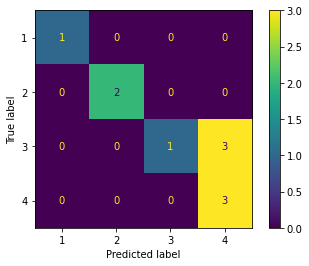

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sv_classifier,
                      xx_Test,
                      yy_Test,
                      values_format = 'd',
)
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yy_Test, yy_Pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1 0 0 0]
 [0 2 0 0]
 [0 0 1 3]
 [0 0 0 3]]

True Positives(TP) =  1

True Negatives(TN) =  2

False Positives(FP) =  0

False Negatives(FN) =  0


# Decision Trees (Best Parameters)

In [32]:
xd = df[['Weight Loss[g]','%Weight Loss','Thickness Loss[mm]','% Thickness Loss']]

In [33]:
yd = df['Time(hrs)']

In [34]:
from sklearn.model_selection import train_test_split
xd_Train, xd_Test,yd_Train,yd_Test = train_test_split(xd, yd, test_size = 0.21, random_state = 42)

# GINI

In [35]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(xd_Train, yd_Train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_pred_gini = clf_gini.predict(xd_Test)

In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(yd_Test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7273


In [38]:
print('Training set score: {:.4f}'.format(clf_gini.score(xd_Train, yd_Train)))

print('Test set score: {:.4f}'.format(clf_gini.score(xd_Test, yd_Test)))

Training set score: 1.0000
Test set score: 0.7273


In [188]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yd_Test, y_pred_gini,squared=False)                #R square error

0.5222329678670935

In [189]:
from sklearn.metrics import r2_score
r2_score(yd_Test, y_pred_en) 

0.835820895522388

In [40]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf_gini, xd, yd, cv= 10)  #Checking for overfitting or underfitting

In [41]:
score

array([0.8 , 1.  , 0.8 , 0.8 , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75])

In [42]:
score.mean()

0.915

# Entropy

In [43]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf_en.fit(xd_Train, yd_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [44]:
y_pred_en = clf_en.predict(xd_Test)

In [45]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(yd_Test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8182


In [181]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yd_Test, y_pred_en,squared=False)                #R square error

0.4264014327112209

In [182]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf_en, xd, yd, cv= 10)  #Checking for overfitting or underfitting

In [185]:
from sklearn.metrics import r2_score
r2_score(yd_Test, y_pred_en) 

0.835820895522388

In [183]:
score

array([0.8, 1. , 0.8, 1. , 1. , 1. , 1. , 0.8, 1. , 0.5])

In [184]:
score.mean()

0.89

# Random Forests (Bagging)

In [50]:
xr = df[['Weight Loss[g]','%Weight Loss','Thickness Loss[mm]','% Thickness Loss']]

In [51]:
yr = df['Time(hrs)']

In [52]:
from sklearn.model_selection import train_test_split
xr_Train, xr_Test,yr_Train,yr_Test = train_test_split(xr, yr, test_size = 0.2, random_state = 42)

In [53]:
xr_Train.shape, xr_Test.shape

((38, 4), (10, 4))

In [54]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(xr_Train, yr_Train)

# Predict the Test set results

y_pred = rfc.predict(xr_Test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(yr_Test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7000


In [55]:
print("Training Accuracy :",rfc.score(xr_Train,yr_Train))
print("Testing Accuracy :",rfc.score(xr_Test,yr_Test))

Training Accuracy : 1.0
Testing Accuracy : 0.7


In [186]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yr_Test, y_pred,squared=False)                #R square error

0.5477225575051661

In [187]:
from sklearn.metrics import r2_score
r2_score(yr_Test, y_pred)

0.6629213483146068

In [57]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, xr, yr, cv= 10)  #Checking for overfitting or underfitting

In [58]:
score

array([0.6 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.8 , 1.  , 0.75])

In [59]:
score.mean()

0.915

#                                                 Part One Complete